In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import collections
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [10]:
fid19p0 = np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func'][0]
fid19p5 = np.load('Run_30_bins_for_all/fidreal_19p5.npz')['func'][0]
fid20p0 = np.load('Run_30_bins_for_all/fidreal_20p0.npz')['func'][0]
fid20p5 = np.load('Run_30_bins_for_all/fidreal_20p5.npz')['func'][0]
fid21p0 = np.load('Run_30_bins_for_all/fidreal_21p0.npz')['func'][0]

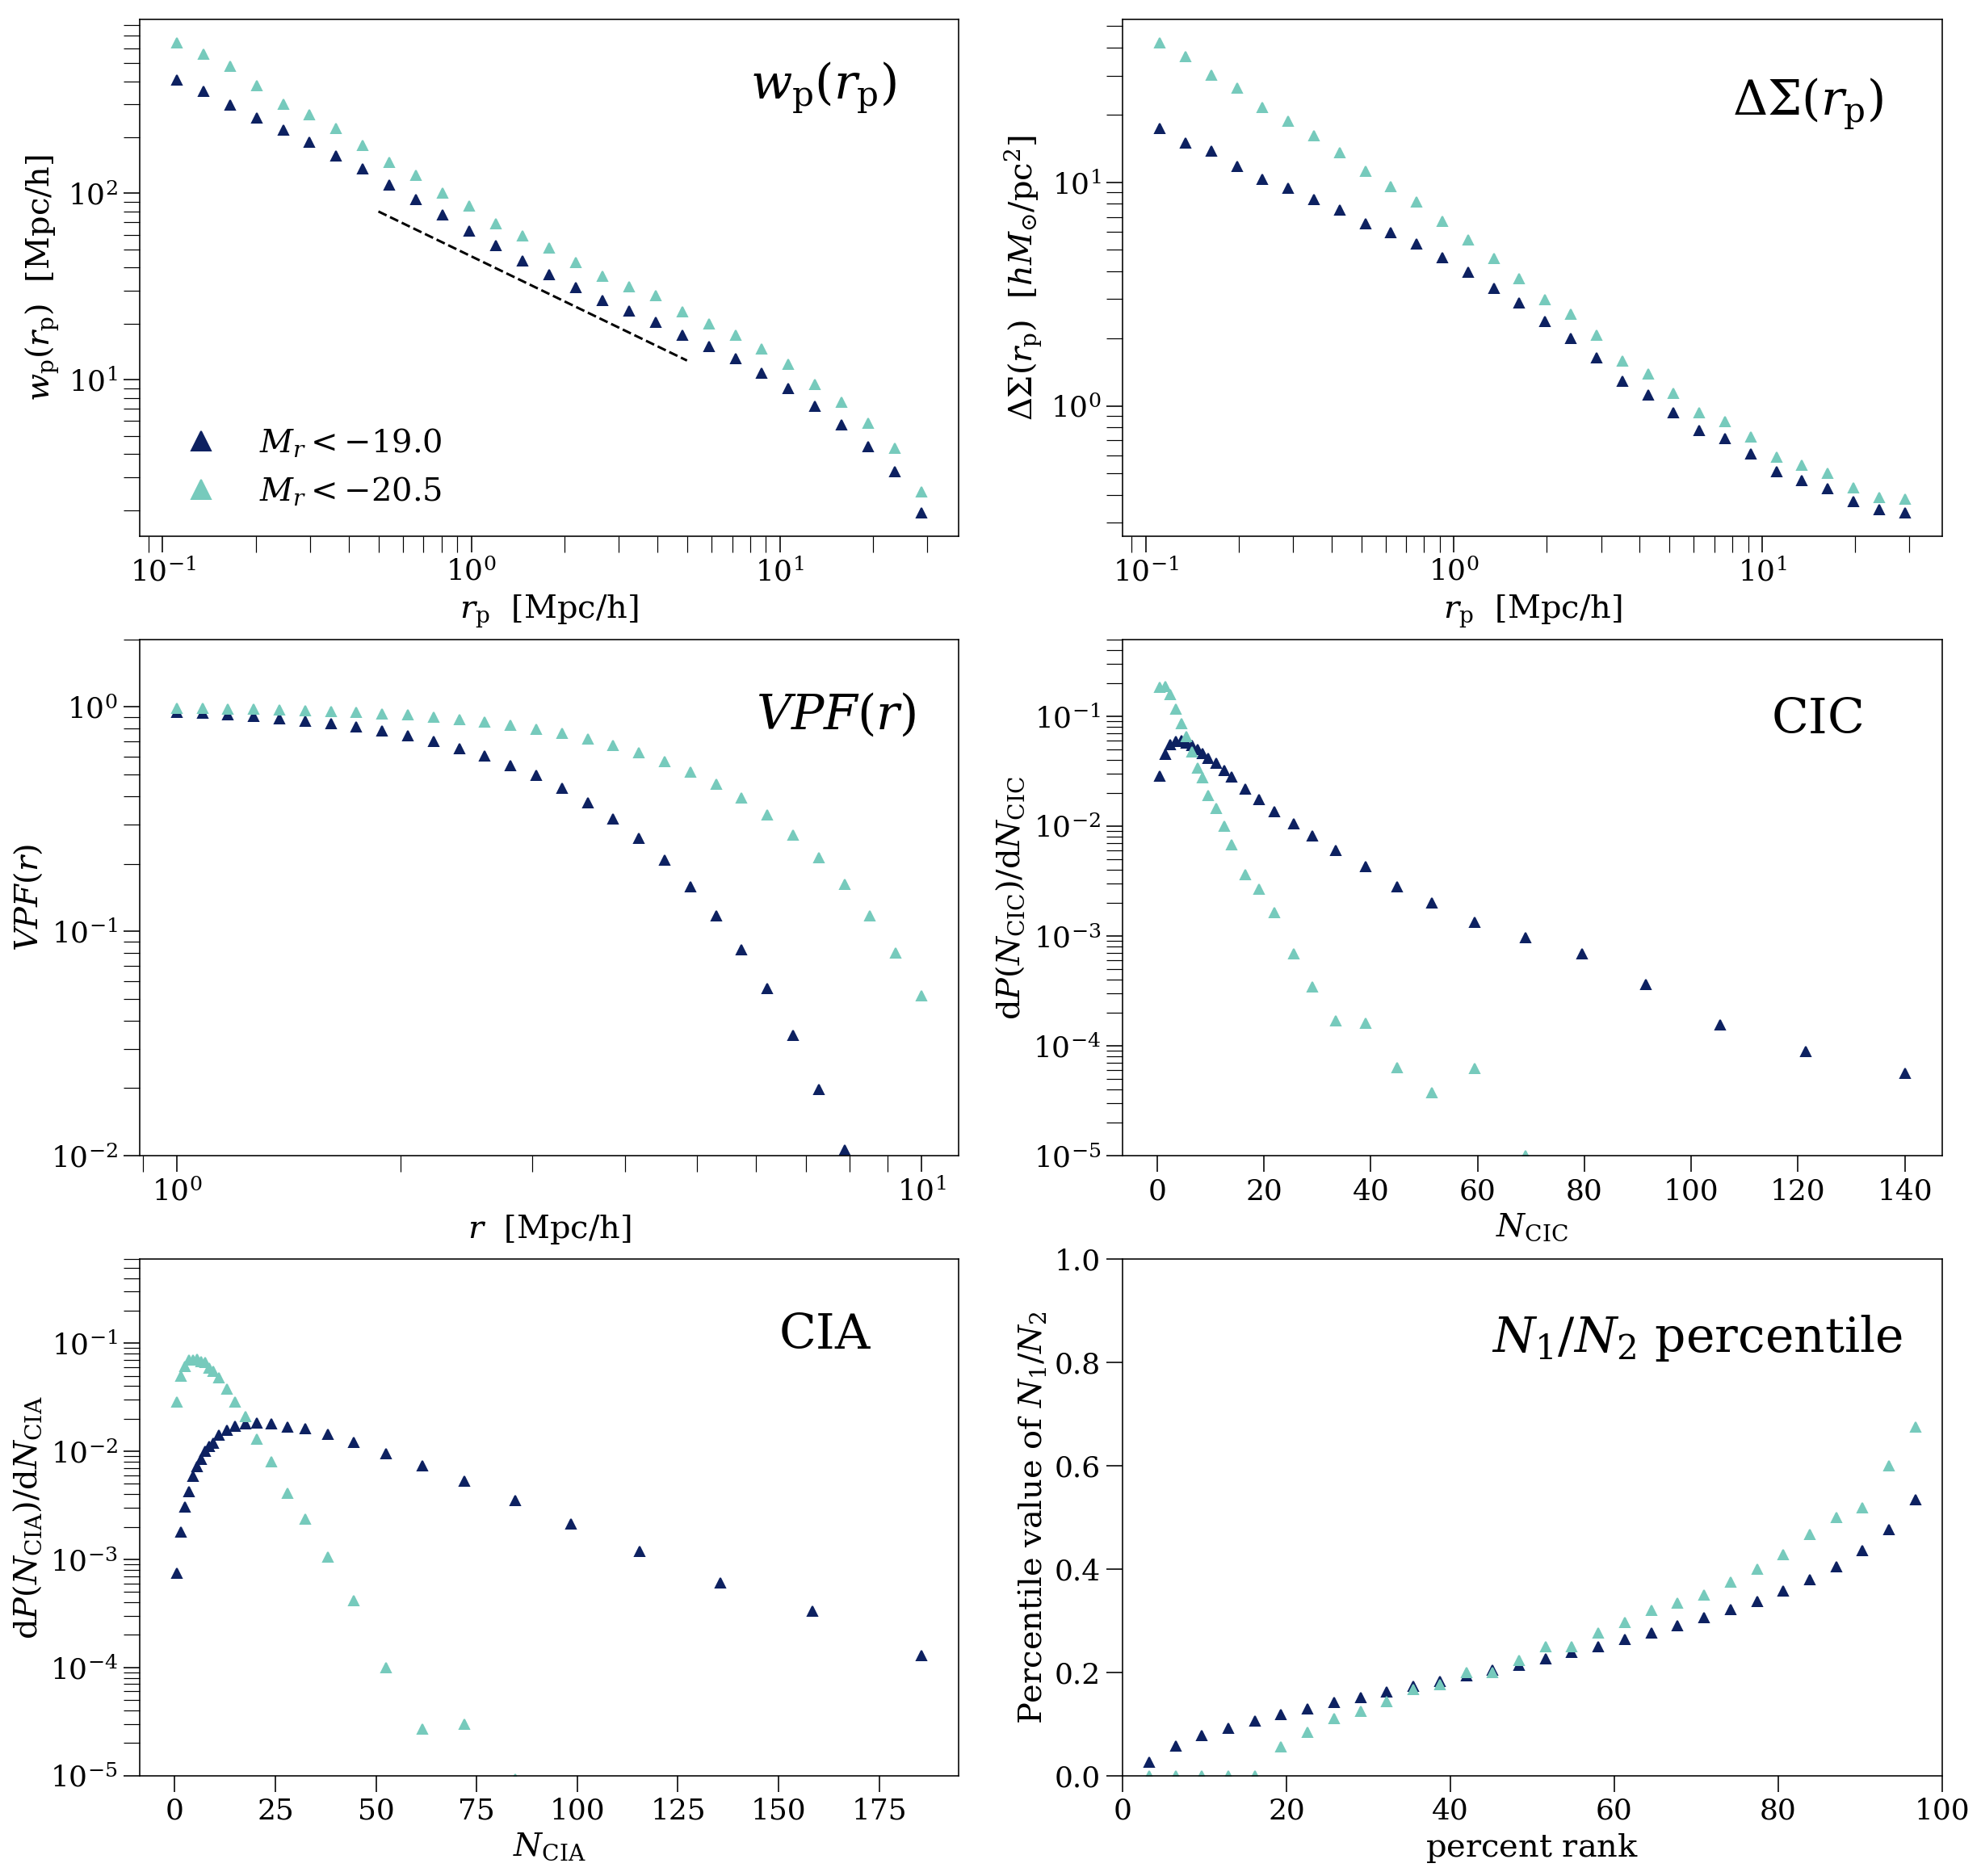

In [78]:
r_wp = np.logspace(-1,1.5,30)
r_wp = (r_wp[1:]+r_wp[:-1])/2.

r_ds = np.logspace(-1,1.5,31)
r_ds = np.sqrt(0.5*(r_ds[1:]**2 + r_ds[:-1]**2))

r_vpf = np.logspace(0,1,30)

cic_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(150),30-10)).astype(np.int)])
cia_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(200),30-10)).astype(np.int)])

q_ratio = np.linspace(0,1,30+2)[1:-1]*100.

plt.subplots(3,2,squeeze=0,figsize=(20,20))
plt.subplot(321)
plt.plot(r_wp,fid19p0[1:30],'^',c=cm.YlGnBu(250),label=r'$M_{\it{r}}<-19.0$')
plt.plot(r_wp,fid20p5[1:30],'^',c=cm.YlGnBu(100),label=r'$M_{\it{r}}<-20.5$')
plt.plot([0.5,5],[80,80*10**(-0.8)],'k--')
plt.legend(frameon=False,fontsize=20,loc=3,markerscale=2)
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$w_\mathrm{p}(r_\mathrm{p})$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(8,320,r'$w_\mathrm{p}(r_\mathrm{p})$',fontsize=30)
plt.subplot(322)
plt.plot(r_ds,fid19p0[30:60],'^',c=cm.YlGnBu(250))
plt.plot(r_ds,fid20p5[30:60],'^',c=cm.YlGnBu(100))
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$\Delta\Sigma(r_\mathrm{p})$  $[h M_{\odot} / {\rm pc}^2]$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(8,20,r'$\Delta\Sigma(r_\mathrm{p})$',fontsize=30)
plt.subplot(323)
plt.plot(r_vpf,fid19p0[60:90],'^',c=cm.YlGnBu(250))
plt.plot(r_vpf,fid20p5[60:90],'^',c=cm.YlGnBu(100))
plt.ylim((1e-2,2))
plt.xlabel(r'$r$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$VPF(r)$',fontsize=20)
plt.loglog()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(6,0.8,r'$VPF(r)$',fontsize=30)
plt.subplot(324)
plt.plot((cic_bin[1:]+cic_bin[:-1])/2.,fid19p0[90:119]/np.diff(cic_bin),'^',c=cm.YlGnBu(250))
plt.plot((cic_bin[1:]+cic_bin[:-1])/2.,fid20p5[90:119]/np.diff(cic_bin),'^',c=cm.YlGnBu(100))
plt.xlabel(r'$N_{\rm{CIC}}$',fontsize=20)
plt.ylabel(r'$\rm{d}\it{P}(\it{N}_{\rm{CIC}})/\rm{d}\it{N}_{\rm{CIC}}$',fontsize=20)
plt.ylim((1e-5,0.5))
plt.semilogy()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(115,0.07,r'$\rm{CIC}$',fontsize=30)
plt.subplot(325)
plt.plot((cia_bin[1:]+cia_bin[:-1])/2.,fid19p0[120:149]/np.diff(cia_bin),'^',c=cm.YlGnBu(250))
plt.plot((cia_bin[1:]+cia_bin[:-1])/2.,fid20p5[120:149]/np.diff(cia_bin),'^',c=cm.YlGnBu(100))
plt.xlabel(r'$N_{\rm{CIA}}$',fontsize=20)
plt.ylabel(r'$\rm{d}\it{P}(\it{N}_{\rm{CIA}})/\rm{d}\it{N}_{\rm{CIA}}$',fontsize=20)
plt.semilogy()
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.ylim(1e-5,0.6)
plt.text(150,0.09,r'$\rm{CIA}$',fontsize=30)
plt.subplot(326)
plt.plot(q_ratio,fid19p0[150:],'^',c=cm.YlGnBu(250))
plt.plot(q_ratio,fid20p5[150:],'^',c=cm.YlGnBu(100))
plt.xlim((0,100))
plt.xlabel(r'$\rm{percent}\ \rm{rank}$',fontsize=20)
plt.ylabel(r'$\rm{Percentile}\ \rm{value}\ \rm{of}$ $N_{\mathrm{1}}/N_{\mathrm{2}}$',fontsize=20)
plt.ylim(0,1)
plt.tick_params(which=u'both',labelsize=18,length=10)
plt.text(45,0.82,r'$N_{\mathrm{1}}/N_{\mathrm{2}}\ \rm{percentile}$',fontsize=30)

In [83]:
fidvd = np.load('Run_30_bins_for_all/fidrandom_19p0.npz')
covjk = np.load('Run_30_bins_for_all/jk_19p0.npz')['jkcov']
covreal = np.cov(np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func'].T)
covvd = np.zeros((180,180))
covvd[60:90,60:90] += np.cov(fidvd['vpf'].T)
covvd[30:60,30:60] += np.cov(fidvd['deltasigma'].T)

covtot = covjk+covreal+covvd

In [84]:
def cov_to_corr(cov):
    stddev = np.sqrt(np.diag(cov))
    return (cov.T/stddev).T/stddev

In [87]:
def cov_clean(cov, return_idx=0):
    covcp = np.copy(cov)
    for i in range(len(covcp)):
        for j in range(len(covcp)):
            if np.abs(covcp[i,j])<1e-15:
                covcp[i,j] = 0
    idx = np.nonzero(covcp.diagonal())[0]
    if return_idx:
        return idx
    else:
        return covcp[idx][:,idx]

In [98]:
corrtot = cov_to_corr(cov_clean(covtot))
idx = cov_clean(covtot,return_idx=1)
corrjk = cov_to_corr(covjk[idx][:,idx])
corrreal = cov_to_corr(covreal[idx][:,idx])
corrvd = cov_to_corr(covvd[idx][:,idx])

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


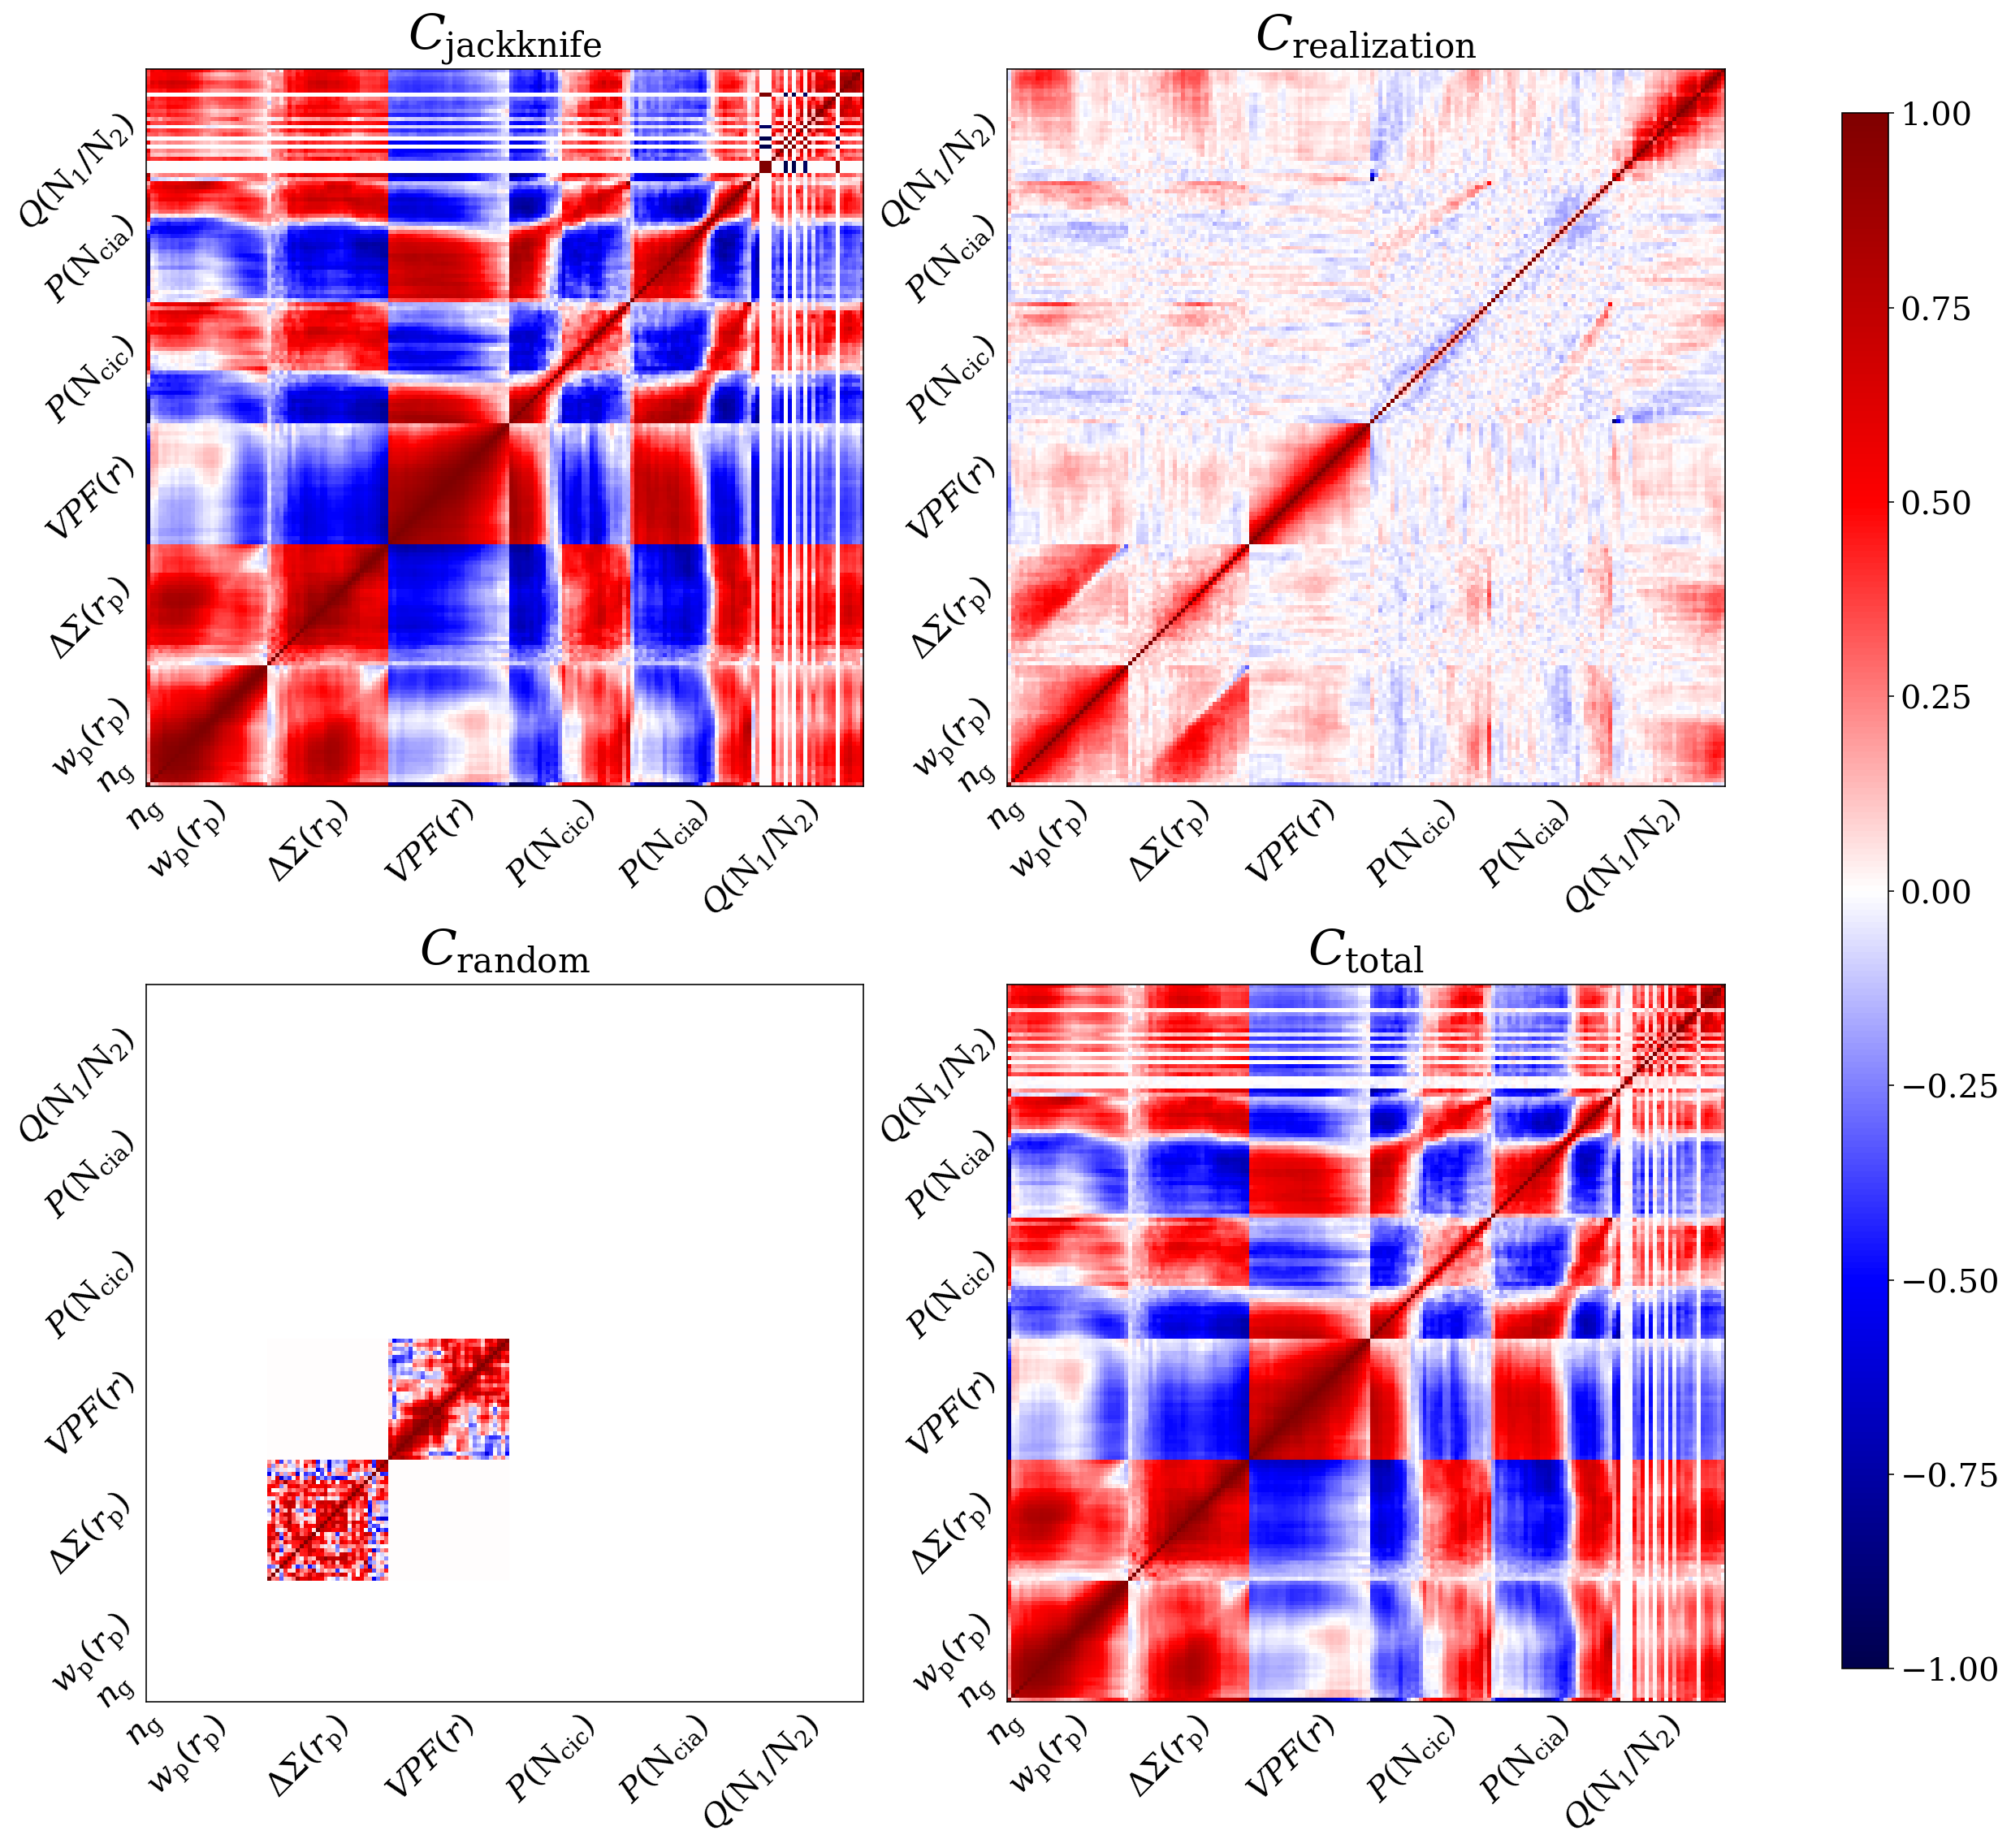

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2,squeeze=0,figsize=(20,19))
ax = axes.flat[0]
ax.set_xticks((-0.5,10,40,70,100,128,152))
ax.set_xticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.set_yticks((172,157,127,97,67,37,12))
ax.set_yticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.tick_params(length=0)
im = ax.imshow(corrjk[::-1], vmin=-1, vmax=1,cmap='seismic')
ax.set_title(r'$C_{\rm{jackknife}}$',fontsize=30)
ax = axes.flat[1]
ax.set_xticks((-0.5,10,40,70,100,128,152))
ax.set_xticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.set_yticks((172,157,127,97,67,37,12))
ax.set_yticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.tick_params(length=0)
im = ax.imshow(corrreal[::-1], vmin=-1, vmax=1,cmap='seismic')
ax.set_title(r'$C_{\rm{realization}}$',fontsize=30)
ax = axes.flat[2]
ax.set_xticks((-0.5,10,40,70,100,128,152))
ax.set_xticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.set_yticks((172,157,127,97,67,37,12))
ax.set_yticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.tick_params(length=0)
im = ax.imshow(corrvd[::-1], vmin=-1, vmax=1,cmap='seismic')
ax.set_title(r'$C_{\rm{random}}$',fontsize=30)
ax = axes.flat[3]
ax.set_xticks((-0.5,10,40,70,100,128,152))
ax.set_xticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.set_yticks((172,157,127,97,67,37,12))
ax.set_yticklabels((r'$n_\mathrm{g}$',r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',r'$VPF(r)$',\
                    r'$P(\rm{N}_{\rm{cic}})$',r'$P(\rm{N}_{\rm{cia}})$',r'$Q(\rm{N}_{\mathrm{1}}/\rm{N}_{\mathrm{2}})$'),\
                   fontsize=20,rotation=45)
ax.tick_params(length=0)
im = ax.imshow(corrtot[::-1], vmin=-1, vmax=1,cmap='seismic')
ax.set_title(r'$C_{\rm{total}}$',fontsize=30)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=20)


plt.show()

In [35]:
jkcov19p0 = np.load('Run_30_bins_for_all/jk_19p0.npz')['jkcov']
realcov19p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_19p0.npz')['func'].T)
jkcov19p5 = np.load('Run_30_bins_for_all/jk_19p5.npz')['jkcov']
realcov19p5 = np.cov(np.load('Run_30_bins_for_all/fidreal_19p5.npz')['func'].T)
jkcov20p0 = np.load('Run_30_bins_for_all/jk_20p0.npz')['jkcov']
realcov20p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_20p0.npz')['func'].T)
jkcov20p5 = np.load('Run_30_bins_for_all/jk_20p5.npz')['jkcov']
realcov20p5 = np.cov(np.load('Run_30_bins_for_all/fidreal_20p5.npz')['func'].T)
jkcov21p0 = np.load('Run_30_bins_for_all/jk_21p0.npz')['jkcov']
realcov21p0 = np.cov(np.load('Run_30_bins_for_all/fidreal_21p0.npz')['func'].T)

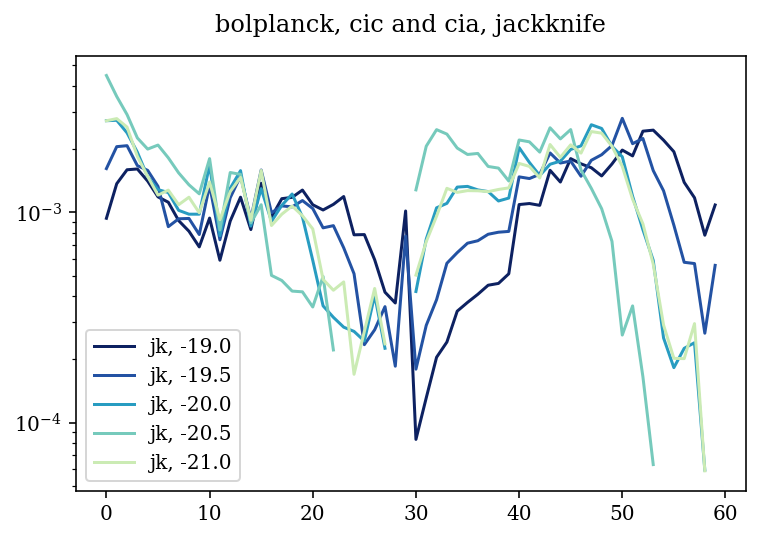

In [40]:
plt.plot(np.sqrt(jkcov19p0.diagonal()[90:150]),label='jk, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(jkcov19p5.diagonal()[90:150]),label='jk, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(jkcov20p0.diagonal()[90:150]),label='jk, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(jkcov20p5.diagonal()[90:150]),label='jk, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(jkcov21p0.diagonal()[90:150]),label='jk, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck, cic and cia, jackknife')

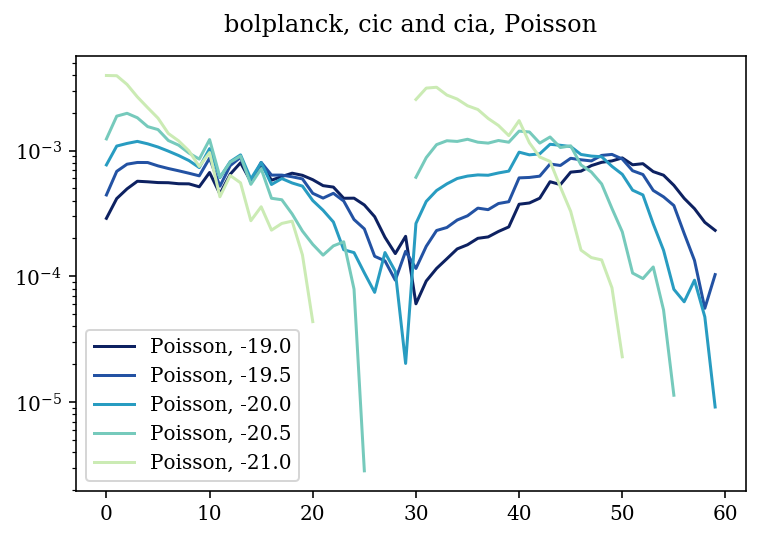

In [41]:
plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[90:150]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[90:150]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[90:150]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck, cic and cia, Poisson')

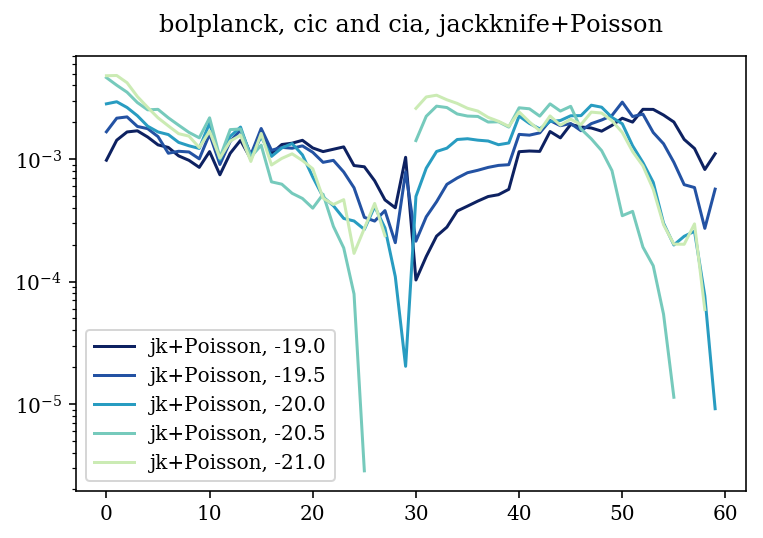

In [42]:
plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[90:150]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[90:150]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[90:150]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[90:150]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck, cic and cia, jackknife+Poisson')

In [17]:
p19p0 = np.array((1.04029, 12.80315, 0.51193, 10.25010, 11.64354, 0., 0.))
p19p5 = np.array((1.11553, 13.06008, 0.44578, 11.29134, 11.75068, 0., 0.))
p20p0 = np.array((1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0., 0.))
p20p5 = np.array((1.19652, 13.59169, 0.18536, 11.20134, 12.25470, 0., 0.))
p21p0 = np.array((1.33738, 13.98811, 0.55950, 11.95797, 12.82356, 0., 0.))

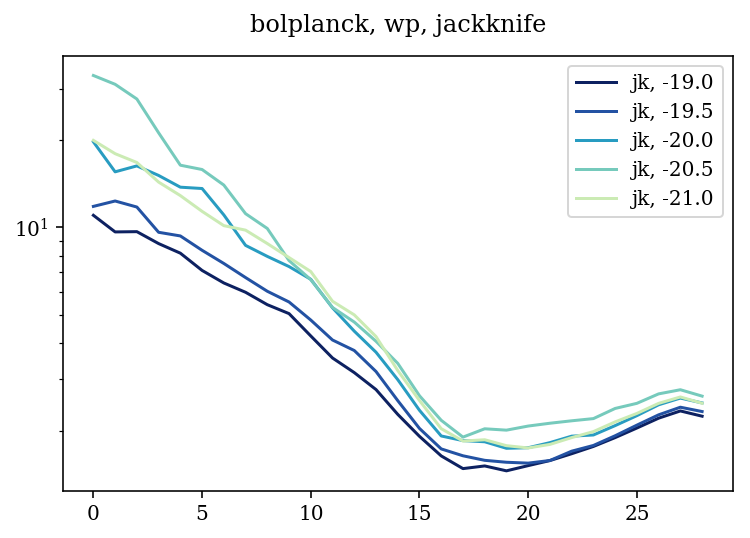

In [44]:
plt.plot(np.sqrt(jkcov19p0.diagonal()[1:30]),label='jk, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(jkcov19p5.diagonal()[1:30]),label='jk, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(jkcov20p0.diagonal()[1:30]),label='jk, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(jkcov20p5.diagonal()[1:30]),label='jk, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(jkcov21p0.diagonal()[1:30]),label='jk, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck, wp, jackknife')

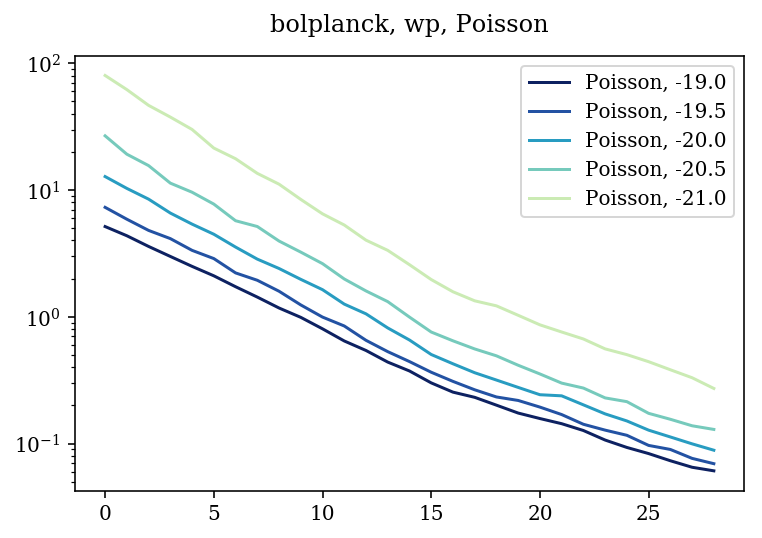

In [43]:
plt.plot(np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[1:30]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[1:30]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[1:30]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[1:30]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck, wp, Poisson')

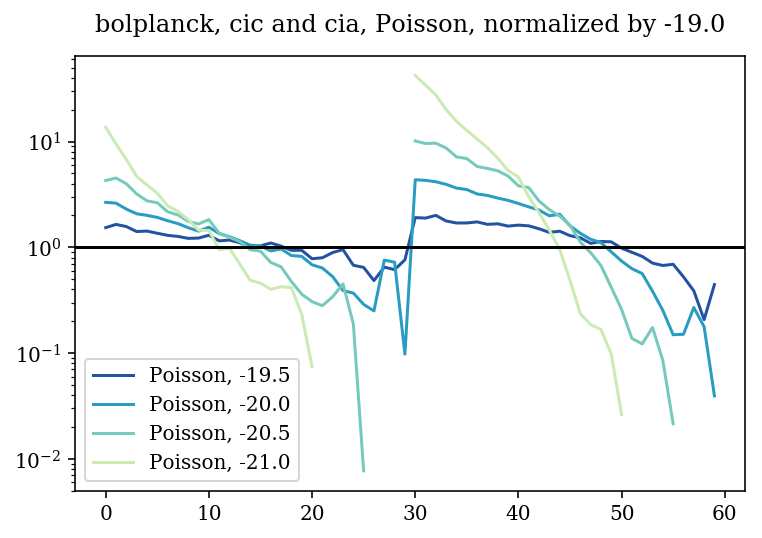

In [50]:
#plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150])/np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.axhline(1,color='k')
plt.title('bolplanck, cic and cia, Poisson, normalized by -19.0')

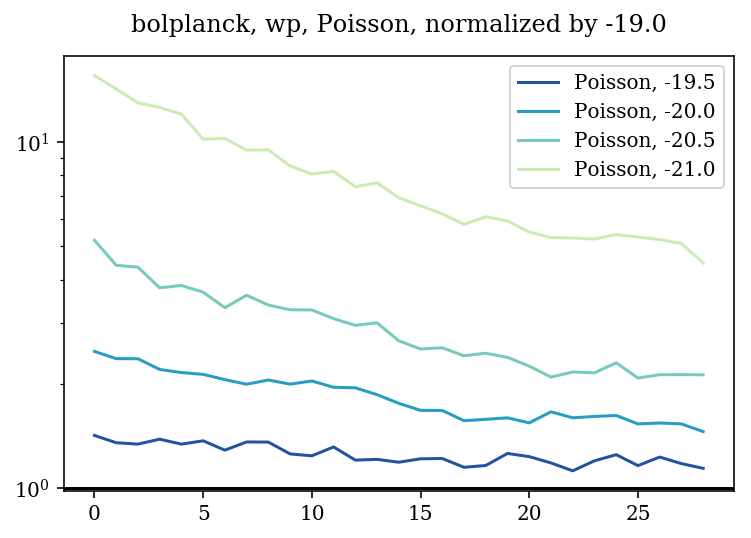

In [51]:
#plt.plot(np.sqrt(realcov19p0.diagonal()[90:150]),label='Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt(realcov19p5.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt(realcov20p0.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt(realcov20p5.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt(realcov21p0.diagonal()[1:30])/np.sqrt(realcov19p0.diagonal()[1:30]),label='Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.axhline(1,color='k')
plt.title('bolplanck, wp, Poisson, normalized by -19.0')

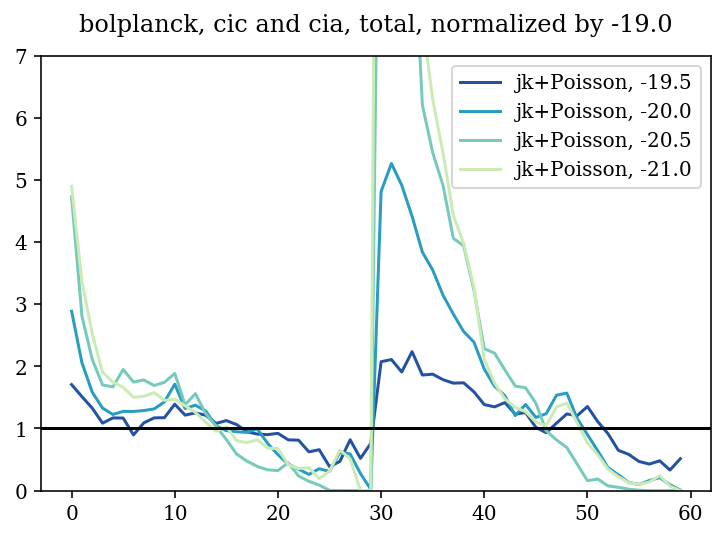

In [52]:
#plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[90:150])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
#plt.semilogy()
plt.ylim(0,7)
plt.axhline(1,color='k')
plt.title('bolplanck, cic and cia, total, normalized by -19.0')

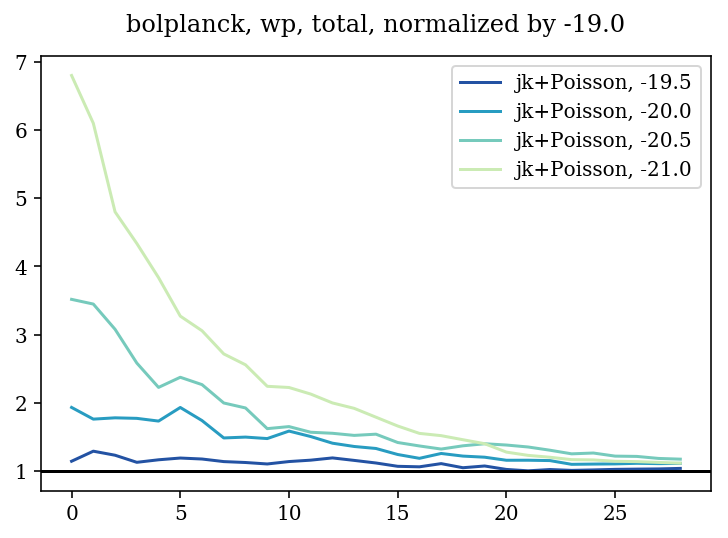

In [53]:
#plt.plot(np.sqrt((jkcov19p0+realcov19p0).diagonal()[90:150]),label='jk+Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5+realcov19p5).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0+realcov20p0).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5+realcov20p5).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0+realcov21p0).diagonal()[1:30])/np.sqrt((jkcov19p0+realcov19p0).diagonal()[1:30]),label='jk+Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
#plt.semilogy()
plt.axhline(1,color='k')
plt.title('bolplanck, wp, total, normalized by -19.0')

/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


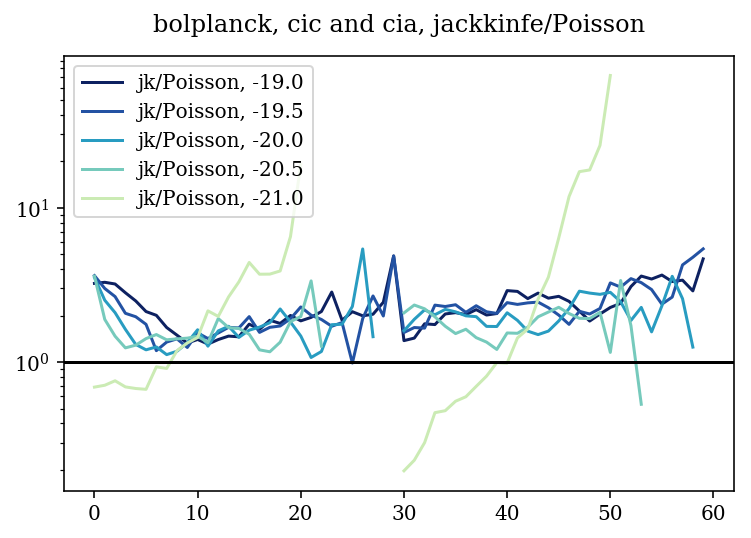

In [54]:
plt.plot(np.sqrt((jkcov19p0/realcov19p0).diagonal()[90:150]),label='jk/Poisson, -19.0',c=cm.YlGnBu(250))
plt.plot(np.sqrt((jkcov19p5/realcov19p5).diagonal()[90:150]),label='jk/Poisson, -19.5',c=cm.YlGnBu(200))
plt.plot(np.sqrt((jkcov20p0/realcov20p0).diagonal()[90:150]),label='jk/Poisson, -20.0',c=cm.YlGnBu(150))
plt.plot(np.sqrt((jkcov20p5/realcov20p5).diagonal()[90:150]),label='jk/Poisson, -20.5',c=cm.YlGnBu(100))
plt.plot(np.sqrt((jkcov21p0/realcov21p0).diagonal()[90:150]),label='jk/Poisson, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.axhline(1,color='k')
plt.title('bolplanck, cic and cia, jackkinfe/Poisson')

In [34]:
fidjk_21p0_md = np.load('Run_multidark_30/jk_21p0.npz')
jkcov21p0_md = fidjk_21p0_md['jkcov']

realcov21p0_md = np.cov(np.load('Run_multidark_30/fidreal_21p0.npz')['func'].T)

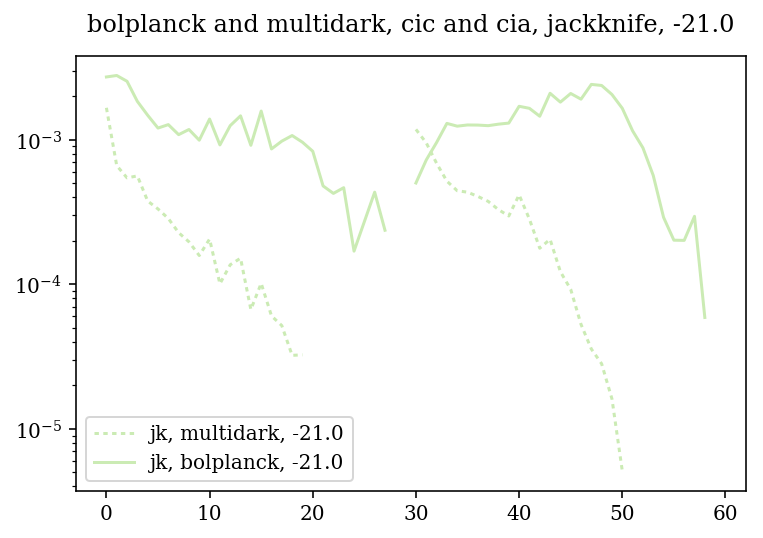

In [55]:
plt.plot(np.sqrt(jkcov21p0_md.diagonal()[90:150]),':',label='jk, multidark, -21.0',c=cm.YlGnBu(60))
plt.plot(np.sqrt(jkcov21p0.diagonal()[90:150]),'-',label='jk, bolplanck, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck and multidark, cic and cia, jackknife, -21.0')

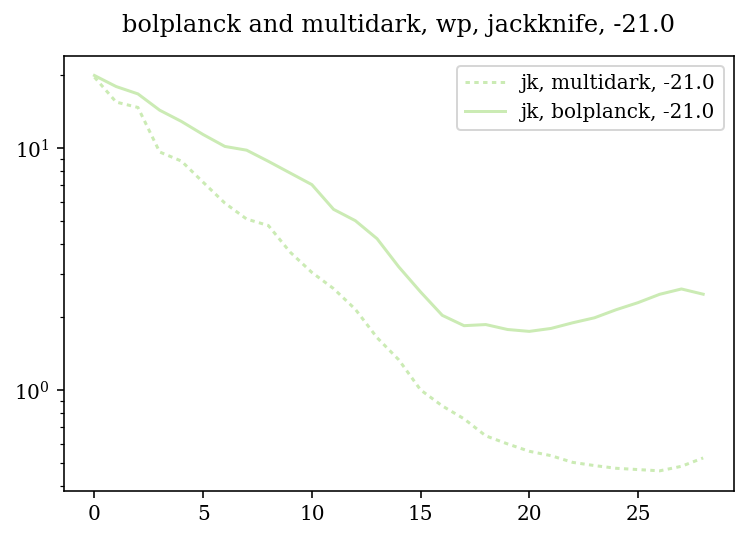

In [56]:
plt.plot(np.sqrt(jkcov21p0_md.diagonal()[1:30]),':',label='jk, multidark, -21.0',c=cm.YlGnBu(60))
plt.plot(np.sqrt(jkcov21p0.diagonal()[1:30]),'-',label='jk, bolplanck, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck and multidark, wp, jackknife, -21.0')

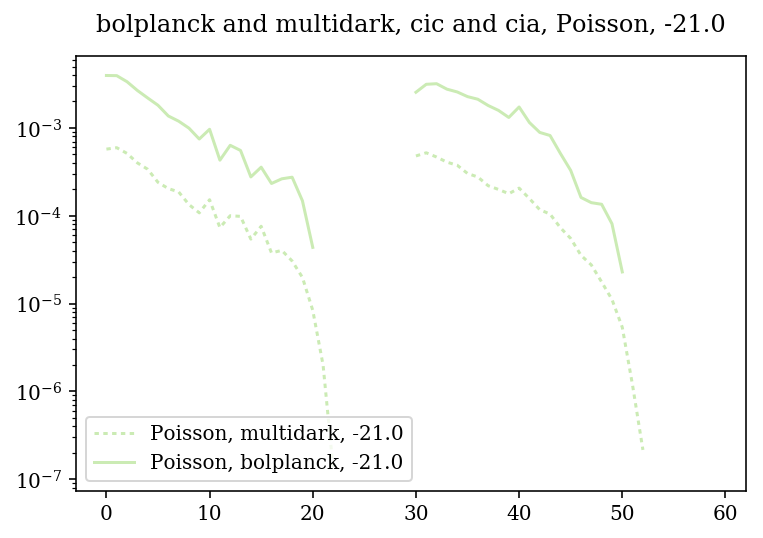

In [57]:
plt.plot(np.sqrt(realcov21p0_md.diagonal()[90:150]),':',label='Poisson, multidark, -21.0',c=cm.YlGnBu(60))
plt.plot(np.sqrt(realcov21p0.diagonal()[90:150]),'-',label='Poisson, bolplanck, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck and multidark, cic and cia, Poisson, -21.0')

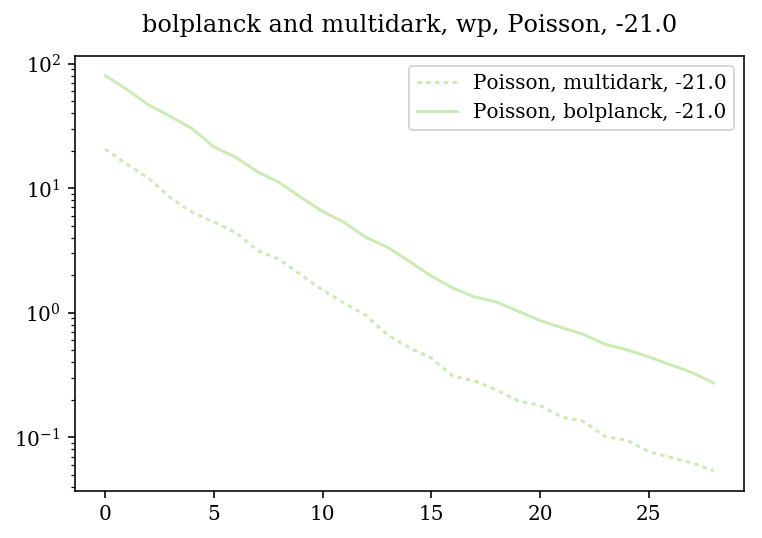

In [58]:
plt.plot(np.sqrt(realcov21p0_md.diagonal()[1:30]),':',label='Poisson, multidark, -21.0',c=cm.YlGnBu(60))
plt.plot(np.sqrt(realcov21p0.diagonal()[1:30]),'-',label='Poisson, bolplanck, -21.0',c=cm.YlGnBu(60))
plt.legend()
plt.semilogy()
plt.title('bolplanck and multidark, wp, Poisson, -21.0')

In [104]:
pert_21p0 = np.load('Run_30_bins_for_all/pert_21p0_14089.npz')
pert_21p0_md = np.load('Run_multidark_30/pert_21p0_34289.npz')

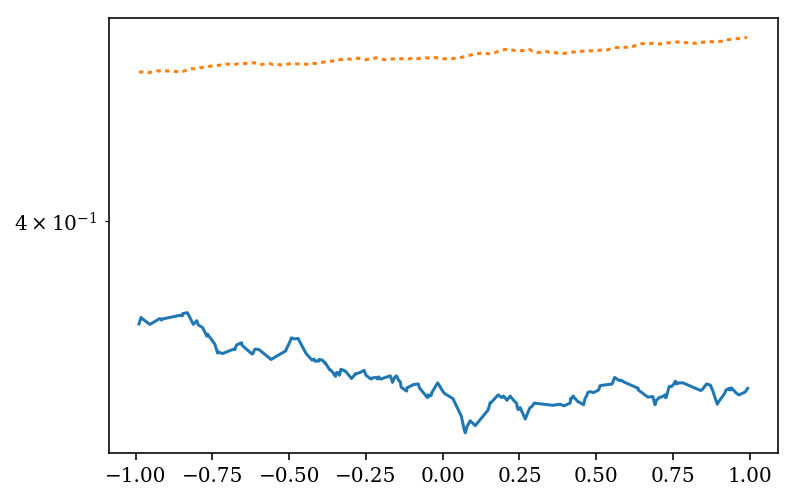

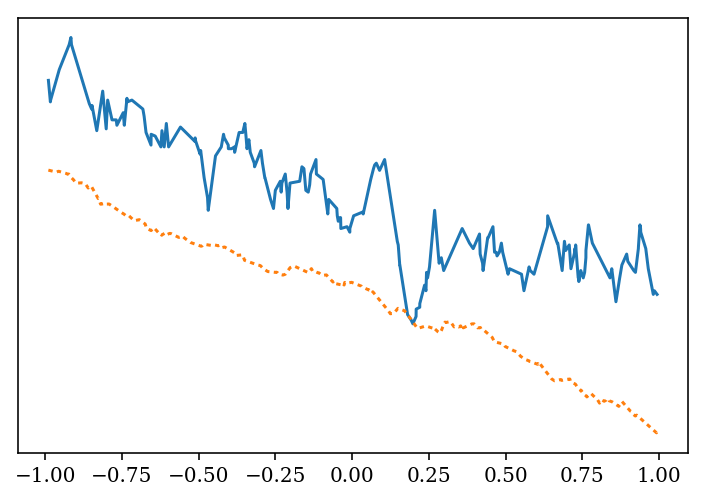

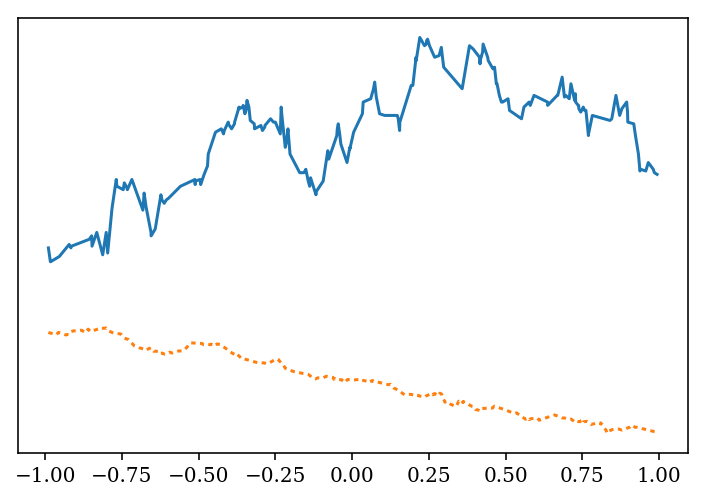

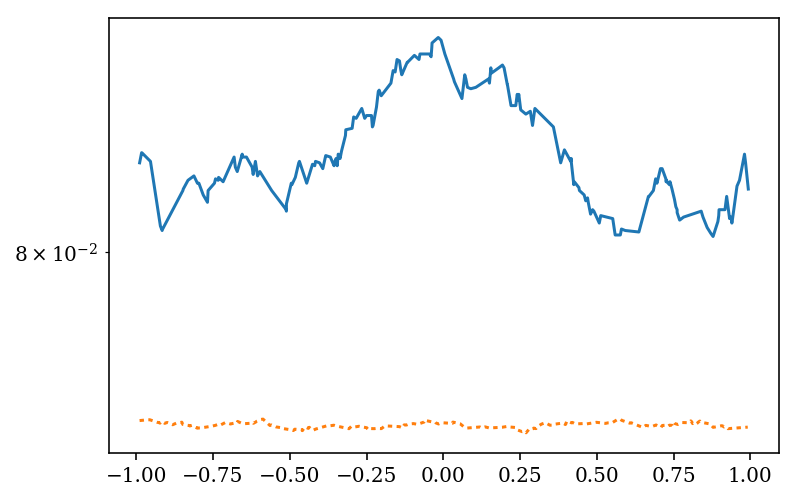

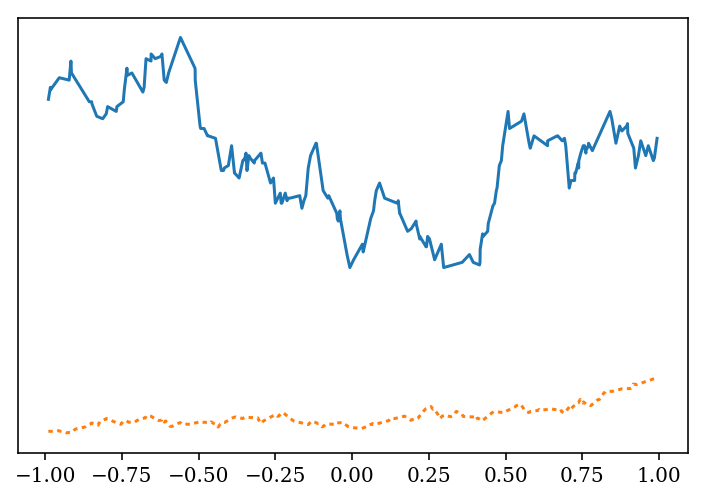

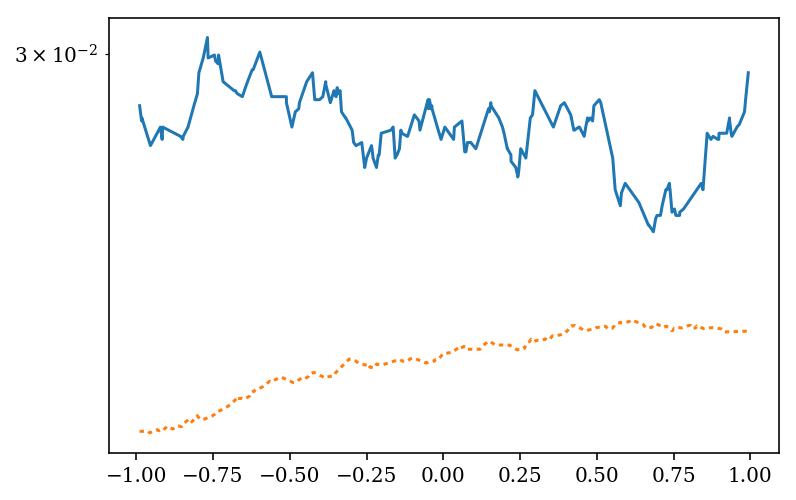

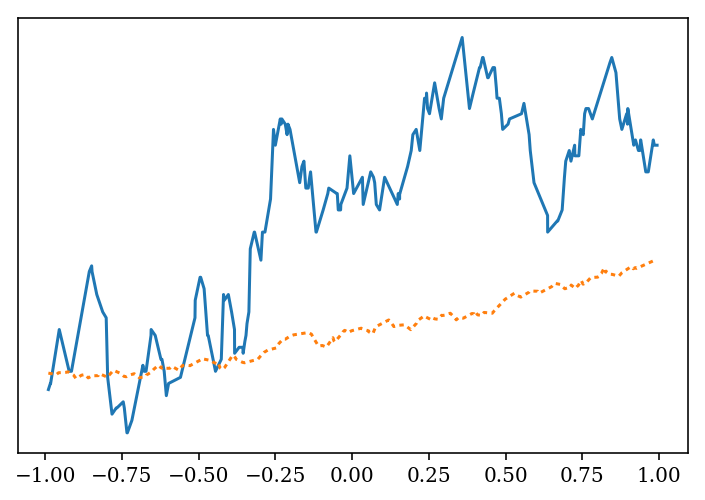

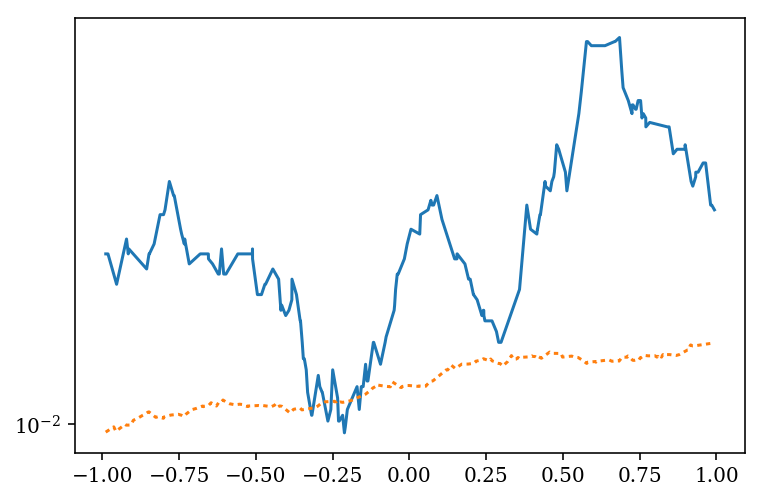

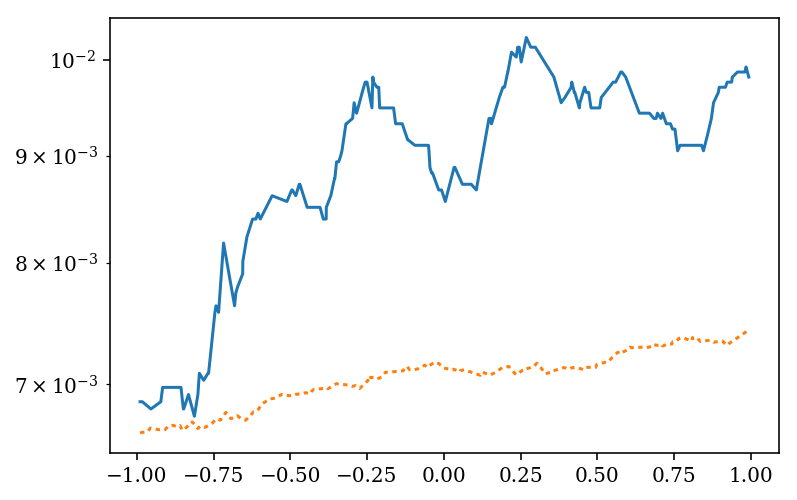

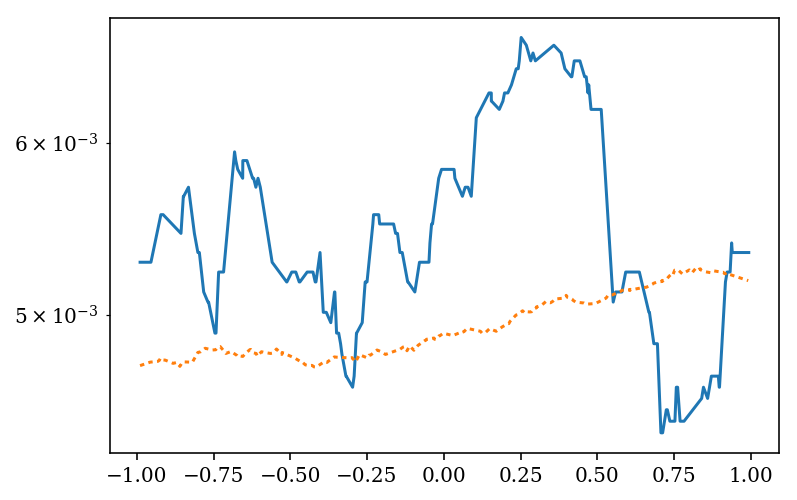

In [113]:
arg = np.argsort(pert_21p0['param'][1000:1200,5])
arg_md = np.argsort(pert_21p0_md['param'][1000:1200,5])
for i in range(10):
    plt.figure()
    plt.plot((pert_21p0['param'][1000:1200,5])[arg],(pert_21p0['func_all'][1000:1200,90+i])[arg])
    plt.plot((pert_21p0_md['param'][1000:1200,5])[arg_md],(pert_21p0_md['func_all'][1000:1200,90+i])[arg_md],':')
    plt.semilogy()

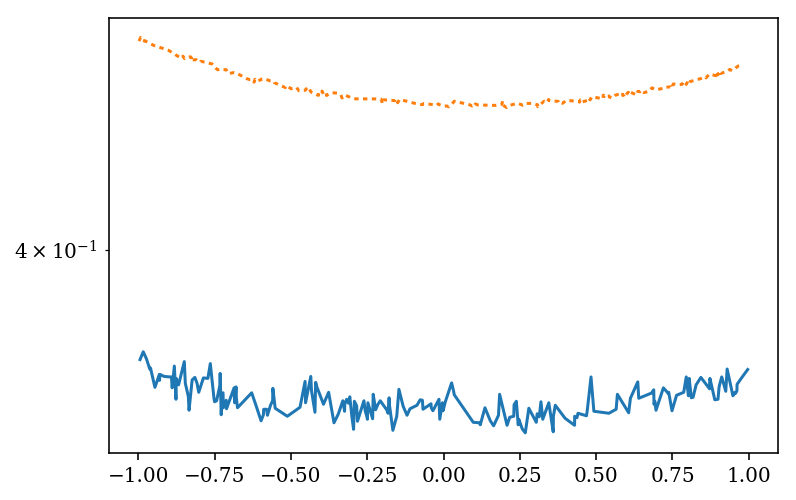

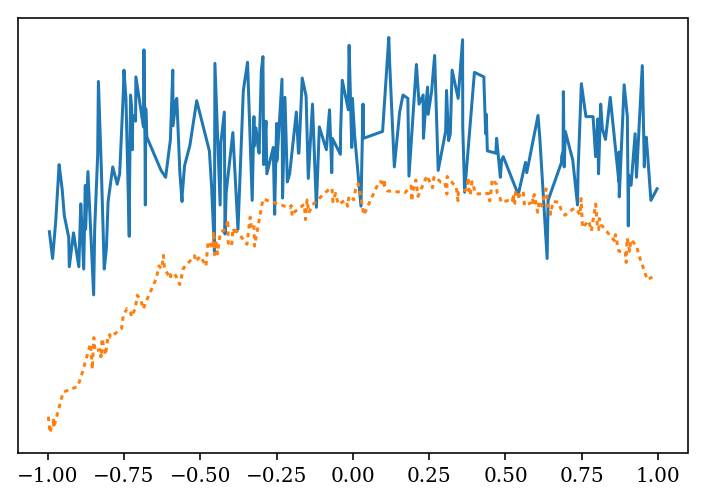

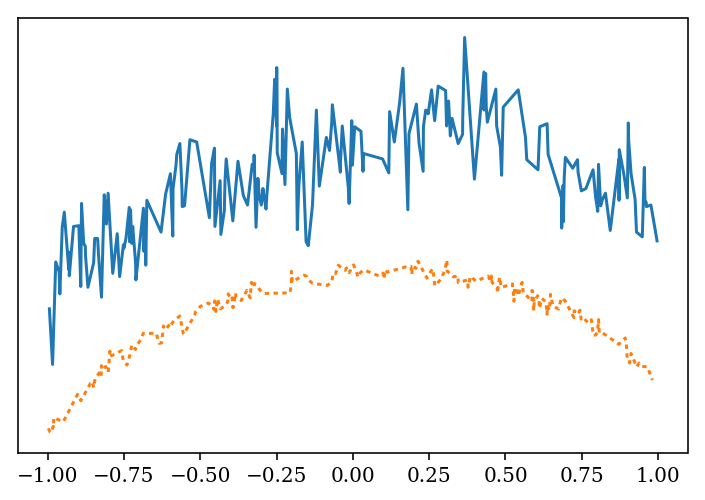

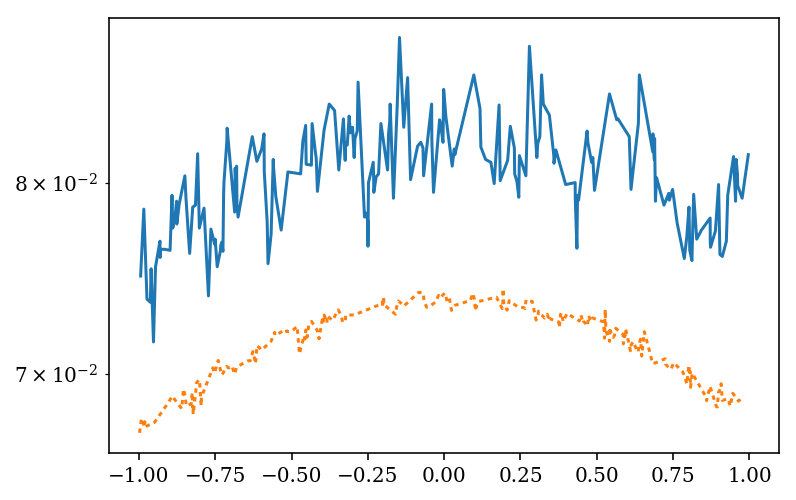

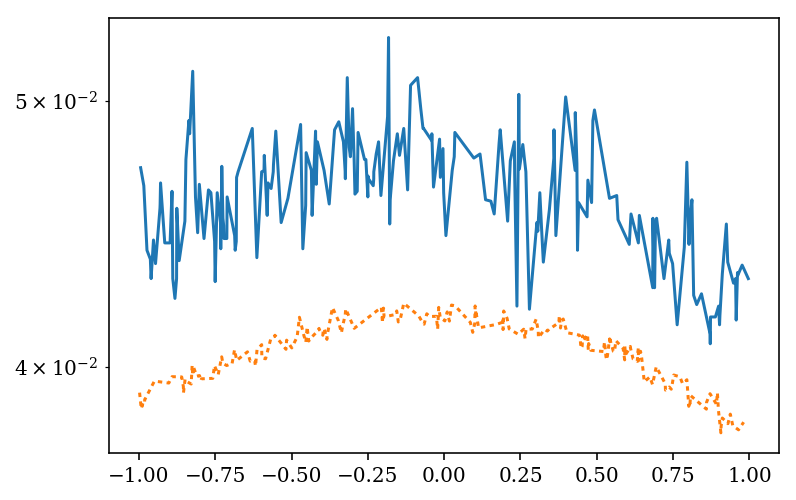

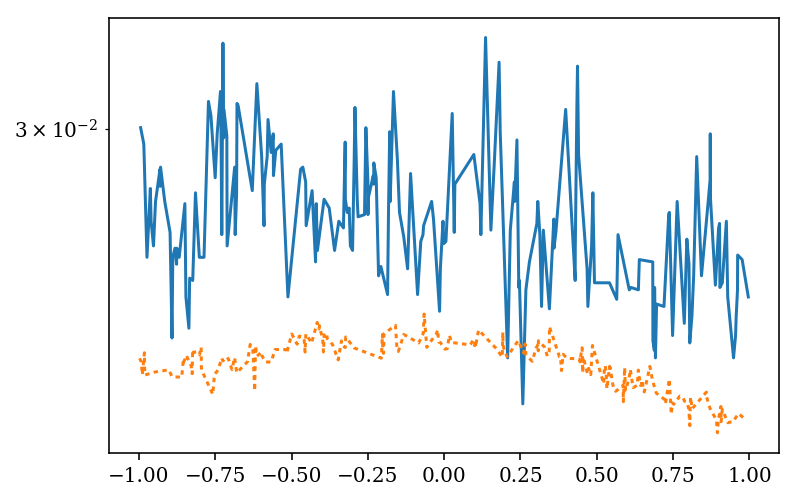

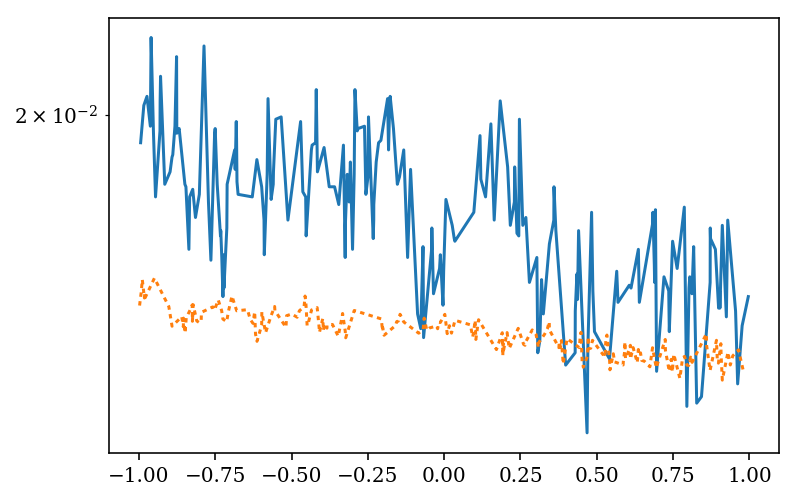

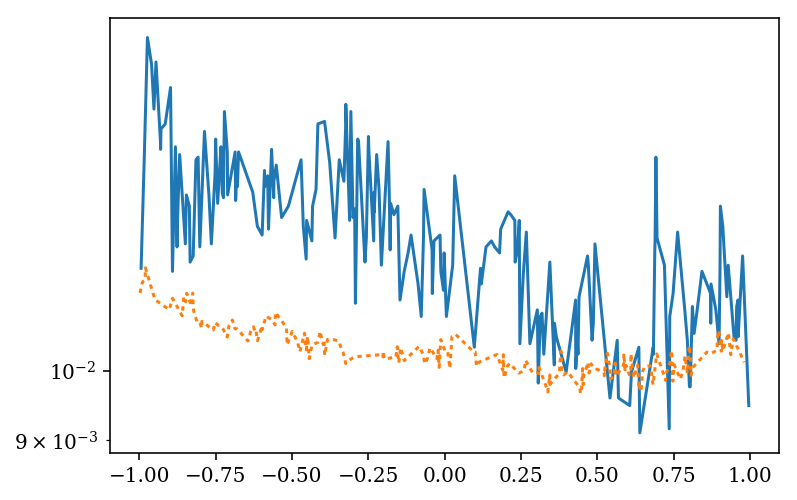

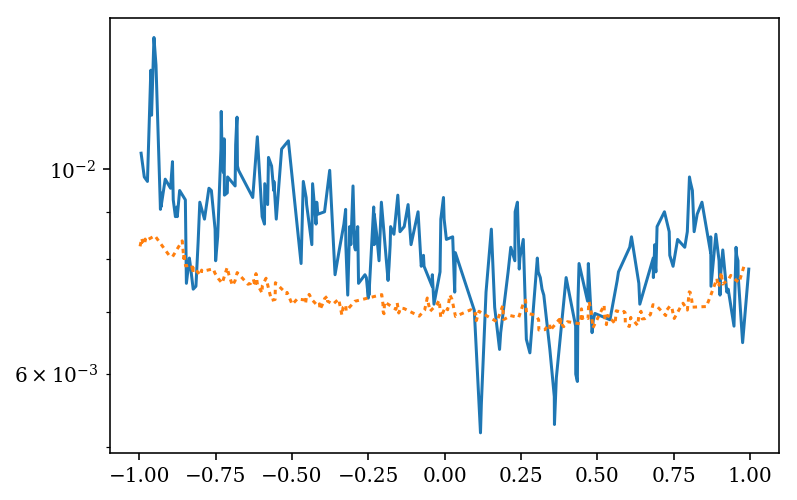

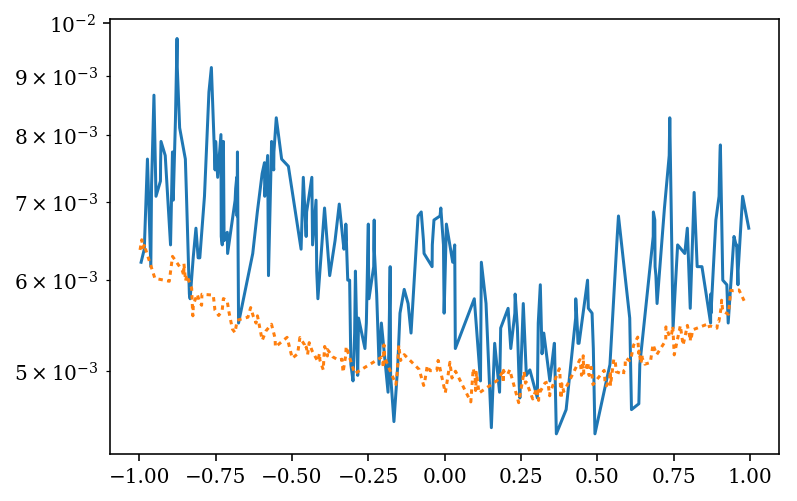

In [115]:
arg = np.argsort(pert_21p0['param'][1200:1400,6])
arg_md = np.argsort(pert_21p0_md['param'][1200:1400,6])
for i in range(10):
    plt.figure()
    plt.plot((pert_21p0['param'][1200:1400,6])[arg],(pert_21p0['func_all'][1200:1400,90+i])[arg])
    plt.plot((pert_21p0_md['param'][1200:1400,6])[arg_md],(pert_21p0_md['func_all'][1200:1400,90+i])[arg_md],':')
    plt.semilogy()

In [ ]:
np.argsort()

In [ ]:
plt.plot()